In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
data=pd.read_csv('Retail_Transactions_2000.csv')
data.head(10)

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123
5,T00006,C3286,Male,63,Delhi,Furniture,2,2758,2023-05-23,Card,5516
6,T00007,C2679,Other,30,Pune,Electronics,5,781,2023-10-22,Card,3905
7,T00008,C9935,Female,35,Hyderabad,Books,5,4599,2023-11-12,Cash,22995
8,T00009,C2424,Female,41,Jaipur,Books,5,2263,2023-06-10,Cash,11315
9,T00010,C7912,Male,70,Lucknow,Groceries,1,1194,2023-02-20,UPI,1194


In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [179]:
data.describe()

,Age,Quantity,Price,TotalAmount
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,44.679000,2.957000,2496.61000,7307.414500
std,15.179795,1.412143,1413.95187,5705.065758
min,18.000000,1.000000,100.00000,111.000000
25%,32.000000,2.000000,1239.00000,2756.250000
50%,45.000000,3.000000,2481.50000,5562.500000
75%,58.000000,4.000000,3695.50000,10751.250000
max,70.000000,5.000000,5000.00000,24950.000000


In [180]:
data.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [181]:
data.shape

(2000, 11)

In [182]:
cols=data.columns.tolist()
print(cols)

['TransactionID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode', 'TotalAmount']


In [183]:
data.duplicated().sum()

np.int64(0)

In [184]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [185]:
data['City'] = data['City'].fillna(data['City'].mode()[0])

In [186]:
data = data.dropna(subset=['TransactionID', 'ProductCategory'])

In [187]:
data = data.drop_duplicates(subset=['TransactionID'])

In [188]:
data = data.drop_duplicates(subset=['TransactionID'])

In [189]:
data['Gender'] = data['Gender'].replace(['m', 'MALE'], 'Male').replace(['f', 'FEMALE'], 'Female')


In [190]:
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]


In [191]:
data['TotalAmount'] = data['TotalAmount'].fillna(data['Quantity'] * data['Price'])


In [192]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data['Month'] = data['PurchaseDate'].dt.month
data['DayOfWeek'] = data['PurchaseDate'].dt.dayofweek  # Monday=0, Sunday=6


In [193]:
bins = [0, 25, 40, 60, 150]
labels = ['18-25', '26-40', '41-60', '60+']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)


In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender_Encoded'] = le.fit_transform(data['Gender'])


In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['Age', 'Price', 'TotalAmount']
data[num_cols] = scaler.fit_transform(data[num_cols])


In [196]:
print(data.isnull().sum())


TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
Month              0
DayOfWeek          0
AgeGroup           0
Gender_Encoded     0
dtype: int64


In [197]:
data.to_csv('Retail_Cleaned.csv', index=False)

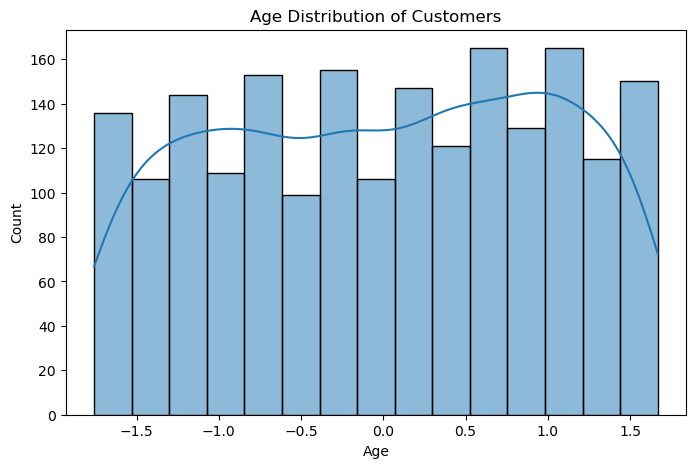

In [198]:
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


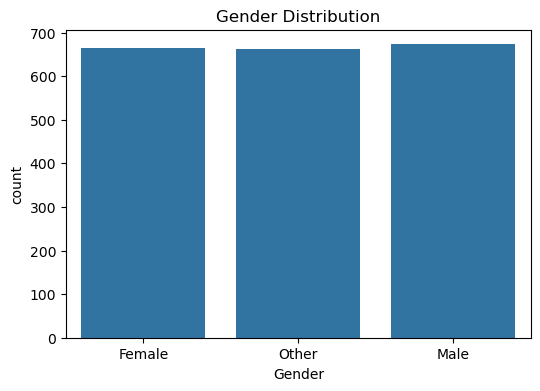

In [199]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()


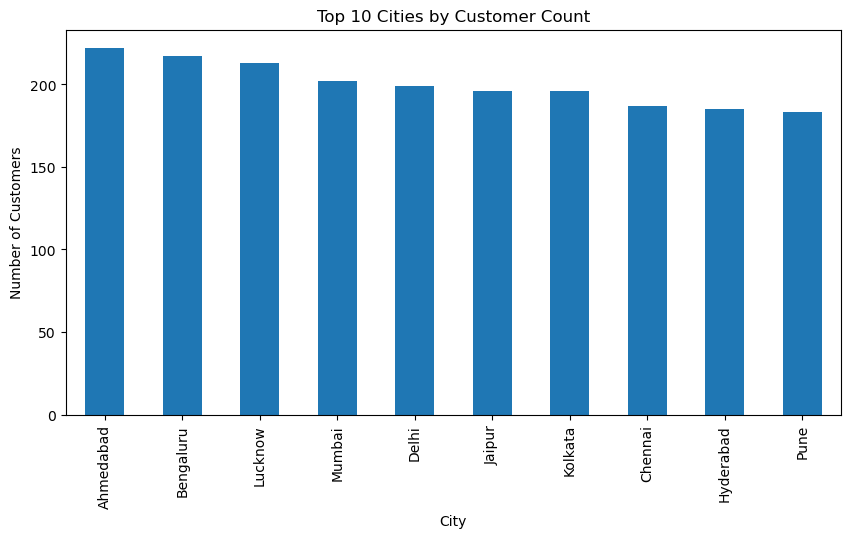

In [200]:
top_cities = data['City'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()


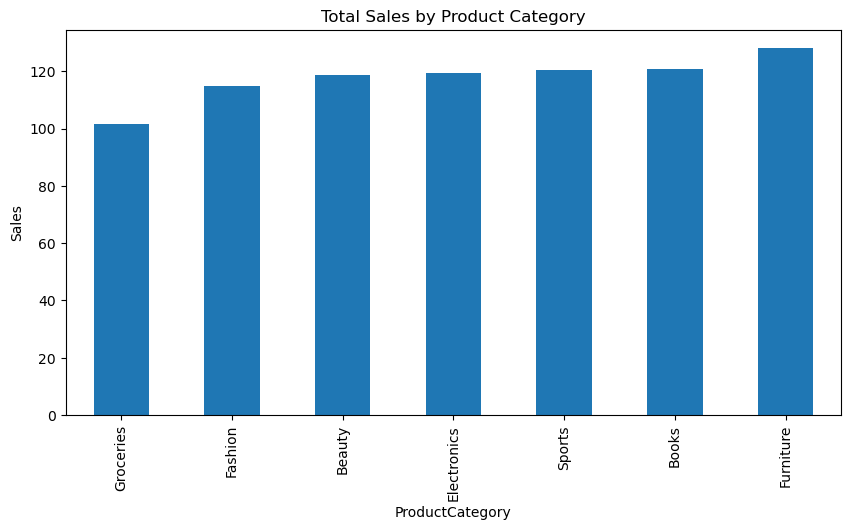

In [201]:
data = data[data['TotalAmount'] > 0]
sales_by_cat = data.groupby('ProductCategory')['TotalAmount'].sum().sort_values()
plt.figure(figsize=(10,5))
sales_by_cat.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales')
plt.show()


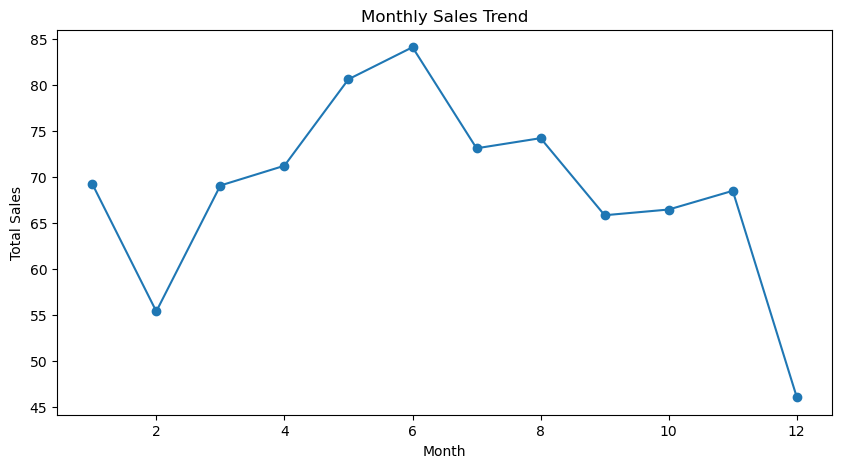

In [202]:
monthly_sales = data.groupby('Month')['TotalAmount'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


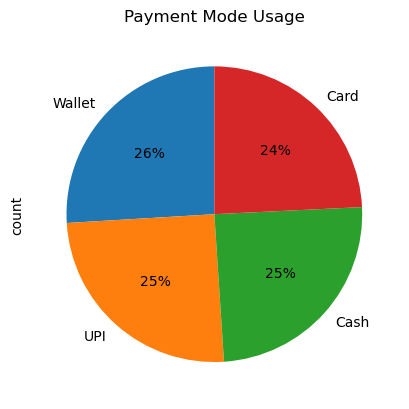

In [203]:
payment_counts = data['PaymentMode'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90)
plt.title('Payment Mode Usage')
plt.show()


C:\Users\Nagaprasad M\AppData\Local\Temp\ipykernel_33216\1724125056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_age = data.groupby('AgeGroup')['TotalAmount'].mean()


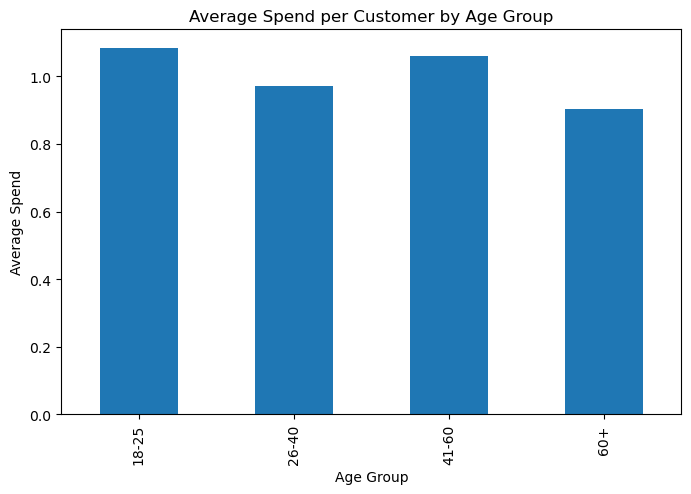

In [204]:
plt.figure(figsize=(6,4))
avg_spend_age = data.groupby('AgeGroup')['TotalAmount'].mean()
avg_spend_age.plot(kind='bar', figsize=(8,5))

plt.title('Average Spend per Customer by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.show()



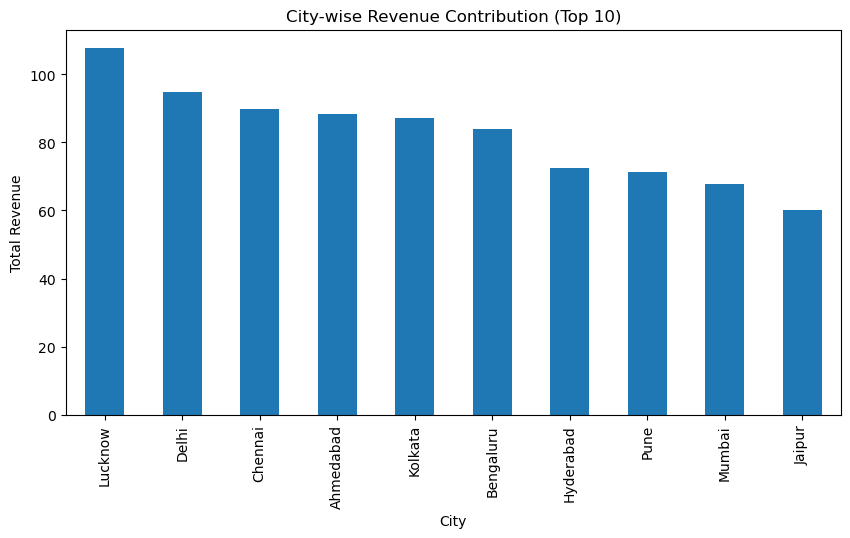

In [205]:
city_revenue = data.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)
city_revenue.plot(kind='bar', figsize=(10,5))
plt.title('City-wise Revenue Contribution (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

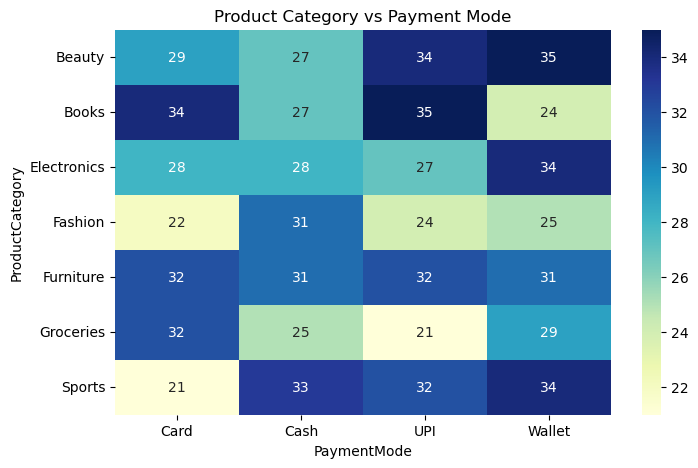

In [206]:
plt.figure(figsize=(8,5))
heatmap_data = pd.crosstab(data['ProductCategory'], data['PaymentMode'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Product Category vs Payment Mode')
plt.show()
